# Week 6: Extrema and Optimization

Demo by Christian Mikkelstrup, Hans Henrik Hermansen, Jakob Lemvig, Karl Johan Måstrup Kristensen and Magnus Troen.

In [1]:
from sympy import *
from dtumathtools import *
init_printing()

When one is about to investigate extrema of a function $f:\Omega \to \mathbb{R}$, then there are in principle three things to investigate. In Theorem 5.2.2 these are described as follows:

1. $\boldsymbol{x}_0 \in \partial \Omega \cap \Omega$ (that is, minimum and/or maximum can be a point on the boundary of the domain $\Omega$)
1. $\boldsymbol{x}_0$ is a point where $f$ **is not** differentiable (called an exceptional point in the following)
1. $\boldsymbol{x}_0$ is a point where $f$ is differentiable and $\nabla f(\boldsymbol{x}_0) = 0$ (called a stationary point)

## Local Extrema, Example 1

We will try to find all extremum points of a function $f: \mathbb{R}^2 \to \mathbb{R}$ given by:

\begin{equation*}
f(x,y) = x^3 - 3x^2 + y^3 - 3y^2.
\end{equation*}

We notice that $f$ is defined and differentiable at all points in $\mathbb{R}^2$. So, there are no boundary points nor exceptional points to investigate.

Hence, we can do with just investigating the stationary points, that are given by the solution to the equations:

In [2]:
x,y = symbols("x y", real=True)
f =  x**3 - 3 * x**2 + y**3 - 3 * y**2
eq1 = Eq(f.diff(x),0)
eq2 = Eq(f.diff(y),0)
display(eq1,eq2)

These equations are non-linear, but are still even so solved rather easily, either by hand or using SymPy:

In [3]:
sols = nonlinsolve([eq1, eq2], [x,y])
sols

Now we have our stationary points. We can then find the partial derivatives of second order and create the Hessian matrix.

In [4]:
H = dtutools.hessian(f)
H

⎡6⋅x - 6     0   ⎤
⎢                ⎥
⎣   0     6⋅y - 6⎦

Next, we insert the stationary points, and the eigenvalues of $\boldsymbol{H}_f$ are investigated, which is easy since $H$ already is *diagonalized*, and the eigenvalues thus can be read directly from the matrix.

In [5]:
[{(x0, y0): H.subs([(x,x0),(y,y0)])} for (x0,y0) in sols]

⎡⎧        ⎡-6  0 ⎤⎫  ⎧        ⎡-6  0⎤⎫  ⎧        ⎡6  0 ⎤⎫  ⎧        ⎡6  0⎤⎫⎤
⎢⎨(0, 0): ⎢      ⎥⎬, ⎨(0, 2): ⎢     ⎥⎬, ⎨(2, 0): ⎢     ⎥⎬, ⎨(2, 2): ⎢    ⎥⎬⎥
⎣⎩        ⎣0   -6⎦⎭  ⎩        ⎣0   6⎦⎭  ⎩        ⎣0  -6⎦⎭  ⎩        ⎣0  6⎦⎭⎦

Theorem 5.2.4 now tells us that $f$ at the point:
- $(0,0)$ attains a strict (local) maximum, since both eigenvalues are negative
- $(2,2)$ attains a strict (local) minimum, since both eigenvalues are positive
- $(0,2)$ is a saddle point, since the eigenvalues have opposite signs
- $(2,0)$ is a saddle point of the same reason as for $(0,2)$

A saddle point is a stationary point that **is not** a local extremum point. Note that we are talking about **local** extremum values here. The function has no maximum or minimum values since it can be shown that $\mathrm{im}(f)=]-\infty,\infty[$.

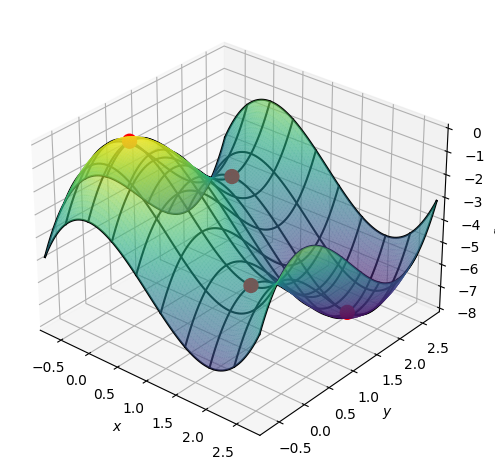

In [6]:
# Show points
list_of_stationary_points = [Matrix([x0,y0,f.subs([(x,x0),(y,y0)])]) for (x0,y0) in sols]
points = dtuplot.scatter(list_of_stationary_points, show=False, rendering_kw={"s" : 100,"color":"red"})

# Show the surface f with the stationary points
pf = dtuplot.plot3d(f,(x,-0.8,2.8),(y,-0.8,2.8),use_cm=True, colorbar=False,show=False,wireframe=True,rendering_kw={"alpha":0.6})
pf.camera = {"azim" : -50, "elev" : 30}
pf.extend(points)
pf.show()

## Local Extrema, Example 2

We now consider a function $f:\mathbb{R}^2 \to \mathbb{R}$ given by

\begin{equation*}
f(x,y) = x^4 + 4x^2y^2 + y^4 -4x^3 - 4y^3 + 2.
\end{equation*}

The domain is the entire $\mathbb{R}^2$, which means that there are no boundary points nor exceptional points to investigate. We will thus just be investigating the stationary points.

In [7]:
x,y = symbols('x y', real=True)

f = x ** 4 + 4 * x**2 * y ** 2 + y ** 4 - 4 * x ** 3 - 4 * y ** 3 + 2
eq1 = Eq(f.diff(x),0)
eq2 = Eq(f.diff(y),0)
eq1,eq2,f

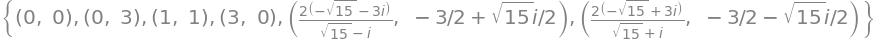

In [8]:
sols = nonlinsolve([eq1,eq2], [x, y])
sols

In [9]:
[(N(xsol),N(ysol)) for (xsol,ysol) in sols]

$\verb|nonlinsolve()|$ does not take into account how we have defined our variables, so eventhough we have tried to define $x,y$ with $\verb|real=True|$, we must use our heads outselves as well. We can here see that four (real) stationary points are found:

In [10]:
stat_points = list(sols)[:-2] # Remove the last two elements (complex solutions) with list-slicing
stat_points

Let us determine the Hessian matrix to be able to investigate the points.

In [11]:
H = dtutools.hessian(f)
H

⎡    2             2                     ⎤
⎢12⋅x  - 24⋅x + 8⋅y         16⋅x⋅y       ⎥
⎢                                        ⎥
⎢                        2       2       ⎥
⎣      16⋅x⋅y         8⋅x  + 12⋅y  - 24⋅y⎦

We insert the stationary points, and since $\boldsymbol{H}_f$ is not diagonalized this time as in the previous example, we will ask SymPy for the eigenvalues:

In [12]:
Hessian_matrices = [H.subs([(x,x0),(y,y0)]) for x0,y0 in stat_points]
Eig_Hessian_matrices = [h.eigenvals() for h in Hessian_matrices]

display(*zip(stat_points,Eig_Hessian_matrices))

From this we read that $f$ has strict minimum at both $(0,3)$ and $(3,0)$. we can see that $(1,1)$ is a saddle point and not an extremum, since we here have both a positive and a negative eigenvalue. 

Since $\boldsymbol{H}_f((0,0))$ has at least one eigenvalue which is zero, we have to perform a special investigation of the point $(0,0)$. Let us try to see how $f$ behaves along the line $y=x$.

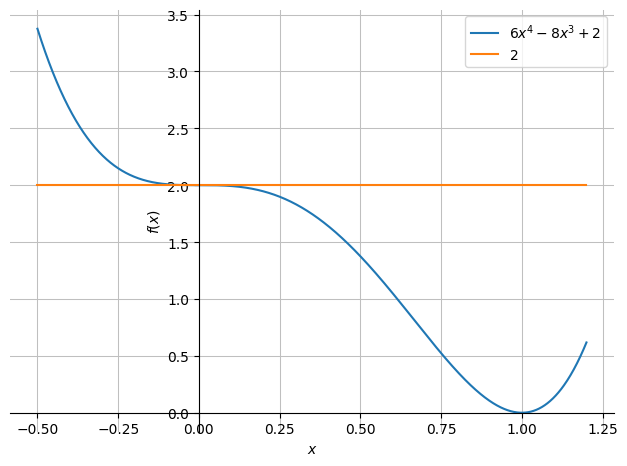

In [13]:
dtuplot.plot(f.subs(y,x),2,(x,-0.5,1.2),axis_center="auto")

Already here it is clear that $(0,0)$ neither is a minimum nor a maximum point. We can investigate this in a bit more detail:

In [14]:
tmp = f.subs(y,x) - f.subs([(x,0),(y,0)])
display(tmp, tmp.factor())

From this we see that


$f(x,x) - f(0,0) > 0$ when $x < 0$ and $f(x,x) - f(0,0) < 0$, when $0 < x < \frac{4}{3}$.

**Since $f(x,x)$ attains values that are both larger and smaller than $f(0,0)$ for $(x,x)$ arbitrarily close to $(0,0)$, then $f$ cannot have extremum at $(0,0)$.**

Let us see the graph of $f$ along with the stationary points.

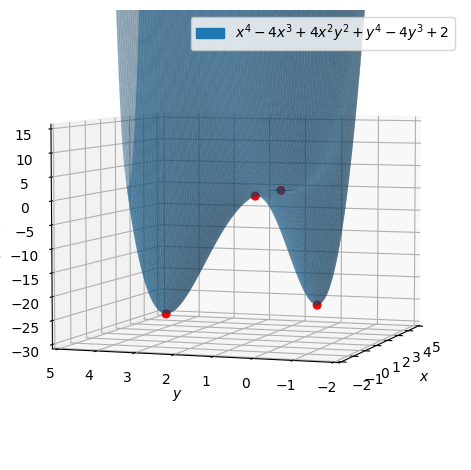

In [15]:
list_of_stationary_points = [Matrix([x0,y0,f.subs([(x,x0),(y,y0)])]) for (x0,y0) in stat_points]
points = dtuplot.scatter(list_of_stationary_points, show=False, rendering_kw={"color":"red", "s" : 30})

pf = dtuplot.plot3d(f,(x,-2, 5),(y,-2, 4),xlim=(-2,5),ylim=(-2,5),zlim=(-30,15), show=False, rendering_kw={"alpha":0.5})
pf.camera = {"azim" : -161, "elev" : 5}
(pf + points).show()

## Global Extrema on Bounded and Closed Set, Example 1

We now consider a function $f:\Omega \to \mathbb{R}$ with the expression

\begin{equation*}
f(x,y) = 3 + x - x ^ 2 - y ^ 2.
\end{equation*}

Again, $f$ is well-defined on the entire $\mathbb{R}^2$, but this time the domain is bounded by

\begin{equation*}
\Omega := \Bigl\{(x,y) \in [0,2]\times[-1,1]\quad |\quad y \leq 1-x\Bigr\},
\end{equation*}

meaning the set that is enclosed by the lines $y = -1$, $y = 1-x$, and $x=0$.

The provided expression contains Boolean functions. In order to plot the expression, the algorithm automatically switched to an adaptive sampling.

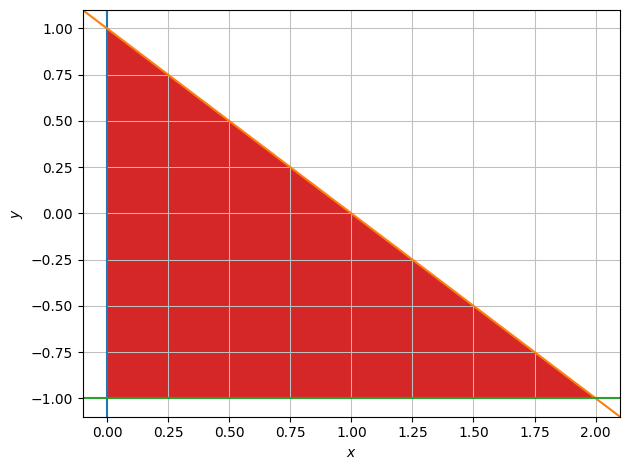

In [16]:
M = dtuplot.plot_implicit(Eq(x,0),Eq(y,1-x),Eq(y,-1), (1-x >= y) & (y >= -1) & (x >= 0),(x,-0.1,2.1),(y,-1.1,1.1),show=False)
M.legend = False
M.show()

We notice that $f$ is differentiable on all of $\Omega$, so there are no exceptional points to take into account. Hence it is also continuous on all of $\Omega$. Since $\Omega$ is closed and bounded, $f$ has a global minimum and maximum on $\Omega$. The two values will be attained either at **stationary points** or on the **boundary**.

Since $\Omega$ is a connected set, the image/range is $f(\Omega) = [m;M]$, where $m$ is the global minimum and $M$ the global maximum.

Let us first have a look at $f$'s level curves:

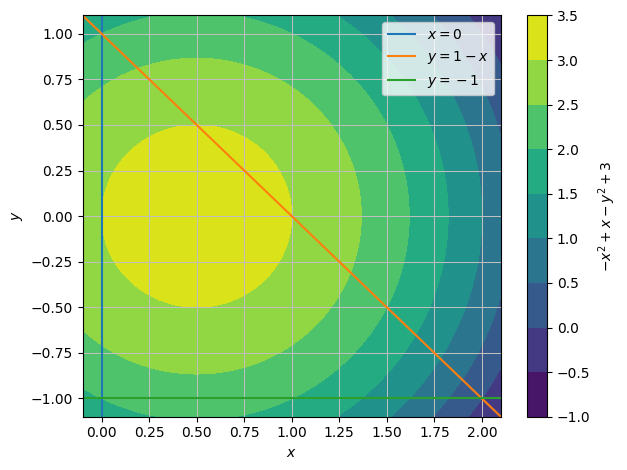

In [17]:
f = 3 + x - x ** 2 - y ** 2
niveau = dtuplot.plot_contour(f,(x,-0.1,2.1),(y,-1.1,1.1),show=False)
niveau.extend(dtuplot.plot_implicit(Eq(x,0),Eq(y,1-x),Eq(y,-1),(x,-0.1,2.1),(y,-1.1,1.1),show=False))
niveau.show()

Let us now compute the **stationary points**.

In [18]:
eq1 = Eq(f.diff(x),0)
eq2 = Eq(f.diff(y),0)
sols = nonlinsolve([eq1,eq2], [x,y])
sols

We see that the point is found in $\Omega$, and is thus a relevant **stationary point.** Let us plot the restriction of $f$ to each of the three boundary lines. 
After this, we will find the **stationary points** on each of these boundary lines.

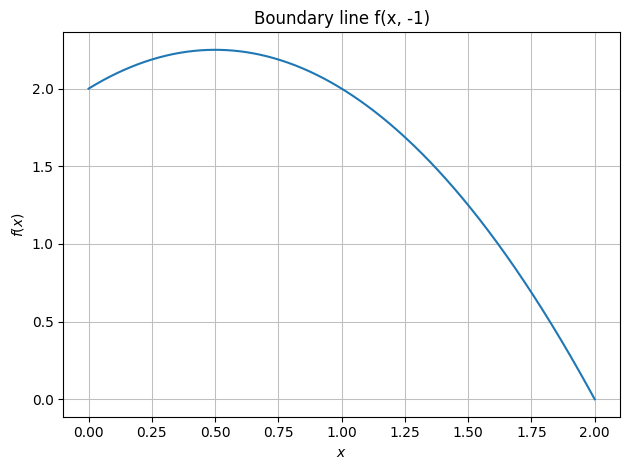

In [19]:
dtuplot.plot(f.subs(y, -1),(x,0,2), title="Boundary line f(x, -1)")

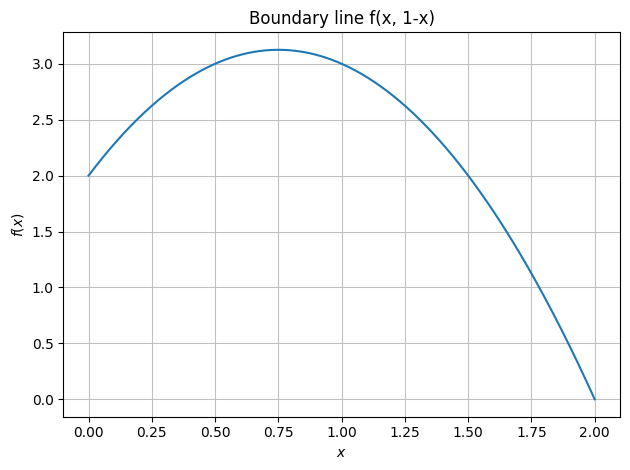

In [20]:
dtuplot.plot(f.subs(y, 1-x),(x,0,2), title="Boundary line f(x, 1-x)")

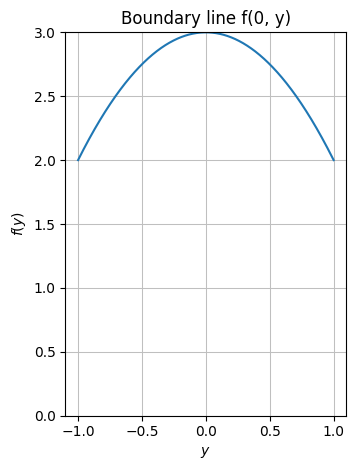

In [21]:
dtuplot.plot(f.subs(x,0), (y,-1,1), ylim = (0,3),aspect="equal", title="Boundary line f(0, y)")

In [22]:
stat_points = set(sols)

vertical = solve(f.subs(x,0).diff(y))
horizontal = solve(f.subs(y,-1).diff(x))
atanangle = solve(f.subs(y,1-x).diff(x))

stat_points.update(set([(0,y0) for y0 in vertical]))
stat_points.update(set([(x0,-1) for x0 in horizontal]))
stat_points.update(set([(x0,1-x0) for x0 in atanangle]))
stat_points

Now we just have to find maximum and minimum between the found stationary points and the end points of the boundary lines, så $(0,1)$,
$(0,-1)$, and $(2,-1)$

In [23]:
investigation_points = list(stat_points) + [(0,1),(0,-1),(2,-1)]
f_values = [f.subs([(x,x0),(y,y0)]) for x0,y0 in investigation_points]

minimum = min(f_values)
maximum = max(f_values)
f_values, minimum, investigation_points[f_values.index(minimum)], maximum, investigation_points[f_values.index(maximum)]

Now we finally have:

Global minimum: $0$ at the point $(2,-1)$  
Global maximum: $\frac{13}{4}$ at the point $(\frac{1}{2},0)$  
Image: $[0,\frac{13}{4}]$

Let us plot everything all together:

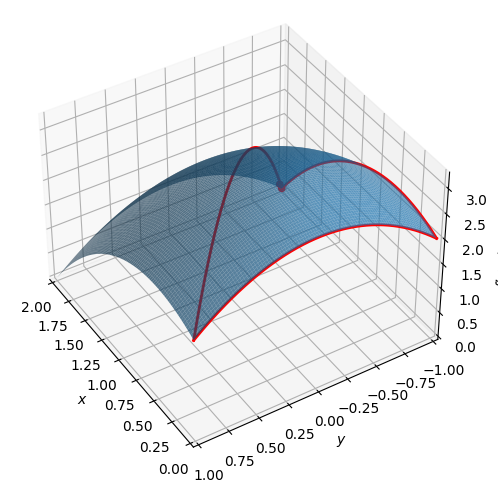

In [24]:
u = symbols("u")
pf = dtuplot.plot3d(f,(x,0,2),(y,-1,1),show=False,rendering_kw={"alpha":0.7})
points = dtuplot.scatter([Matrix([2,-1,0]),Matrix([1/2,0,13/4])],show=False,rendering_kw={"color":"red","s":20})
l1 = dtuplot.plot3d_parametric_line(u,-1,f.subs({x:u,y:-1}),(u,0,2),use_cm=False,show=False,rendering_kw={"color":"red","linewidth":2})
l2 = dtuplot.plot3d_parametric_line(0,u,f.subs({x:0,y:u}),(u,-1,1),use_cm=False,show=False,rendering_kw={"color":"red","linewidth":2})
l3 = dtuplot.plot3d_parametric_line(u,1-u,f.subs({x:u,y:1-u}),(u,0,2),use_cm=False,show=False,rendering_kw={"color":"red","linewidth":2})
combined = (pf + points + l1 + l2 + l3)
combined.camera = {"azim" : 148, "elev" : 40}
combined.legend = False

combined.show()